# svc= with probability 

In [354]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [90]:
import os
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\cases\Satellite Imaging")
df=pd.read_csv("Satellite.csv",sep=";")

In [91]:
le=LabelEncoder()
df["classes"]=le.fit_transform(df["classes"])
print(le.classes_)
y=df["classes"]
x=df.drop('classes',axis=1)

['cotton crop' 'damp grey soil' 'grey soil' 'red soil'
 'vegetation stubble' 'very damp grey soil']


In [92]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,stratify=y,random_state=24)

In [93]:
svm=SVC(probability =True,random_state=24,decision_function_shape="ovo")
svm.fit(xtrain,ytrain)

SVC(decision_function_shape='ovo', probability=True, random_state=24)

In [94]:
y_pred=svm.predict(xtest)

In [95]:
print(accuracy_score(ytest,y_pred))


0.8834800621439669


In [96]:
y_pred_prob=svm.predict_proba(xtest)
print(log_loss(ytest,y_pred_prob))

0.2991297114029514


# OVO vs OVR

In [84]:
params={"kernel":["rbf","linear"],"C":np.linspace(0.01,4,10),"gamma":np.linspace(0.01,4,10),"decision_function_shape":["ovo","ovr"]}

In [85]:

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=24)


In [ ]:
svm_gcv=RandomizedSearchCV(svm,param_distributions=params,verbose=3,cv=kfold,scoring="neg_log_loss",random_state=24)
svm_gcv.fit(x,y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=0.8966666666666667, decision_function_shape=ovr, gamma=3.1133333333333333, kernel=linear;, score=-0.347 total time= 1.3min
[CV 2/5] END C=0.8966666666666667, decision_function_shape=ovr, gamma=3.1133333333333333, kernel=linear;, score=-0.339 total time= 1.2min
[CV 3/5] END C=0.8966666666666667, decision_function_shape=ovr, gamma=3.1133333333333333, kernel=linear;, score=-0.369 total time= 1.2min
[CV 4/5] END C=0.8966666666666667, decision_function_shape=ovr, gamma=3.1133333333333333, kernel=linear;, score=-0.356 total time= 1.2min
[CV 5/5] END C=0.8966666666666667, decision_function_shape=ovr, gamma=3.1133333333333333, kernel=linear;, score=-0.345 total time= 1.2min
[CV 1/5] END C=1.7833333333333334, decision_function_shape=ovr, gamma=1.34, kernel=rbf;, score=-1.722 total time=  24.3s
[CV 2/5] END C=1.7833333333333334, decision_function_shape=ovr, gamma=1.34, kernel=rbf;, score=-1.721 total time=  24.2s
[CV 3/5

In [ ]:
print(gcv.best_params_)
print(gcv.best_score_)

# Decision Tree

In [131]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\cases\human-resources-analytics")

In [157]:
df=pd.read_csv("HR_comma_sep.csv")
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.10             0.77               6                   247   
3                0.92             0.85               5                   259   
4                0.89             1.00               5                   224   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   5              0     1                      0      sales   

   salary  
0     low  
1  medium  
2     low  
3     low  
4     low

In [133]:
dum_df=pd.get_dummies(df,drop_first=True)
print(dum_df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')


In [134]:
x=dum_df.drop("left",axis=1)
y=dum_df["left"]

In [135]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,stratify=y,random_state=24)

In [152]:
dtc=DecisionTreeClassifier(random_state=24,max_depth=2)
#dtc=DecisionTreeClassifier(random_state=24,max_depth=None)  #tree till maximum depth where gini is 0

In [153]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=2, random_state=24)

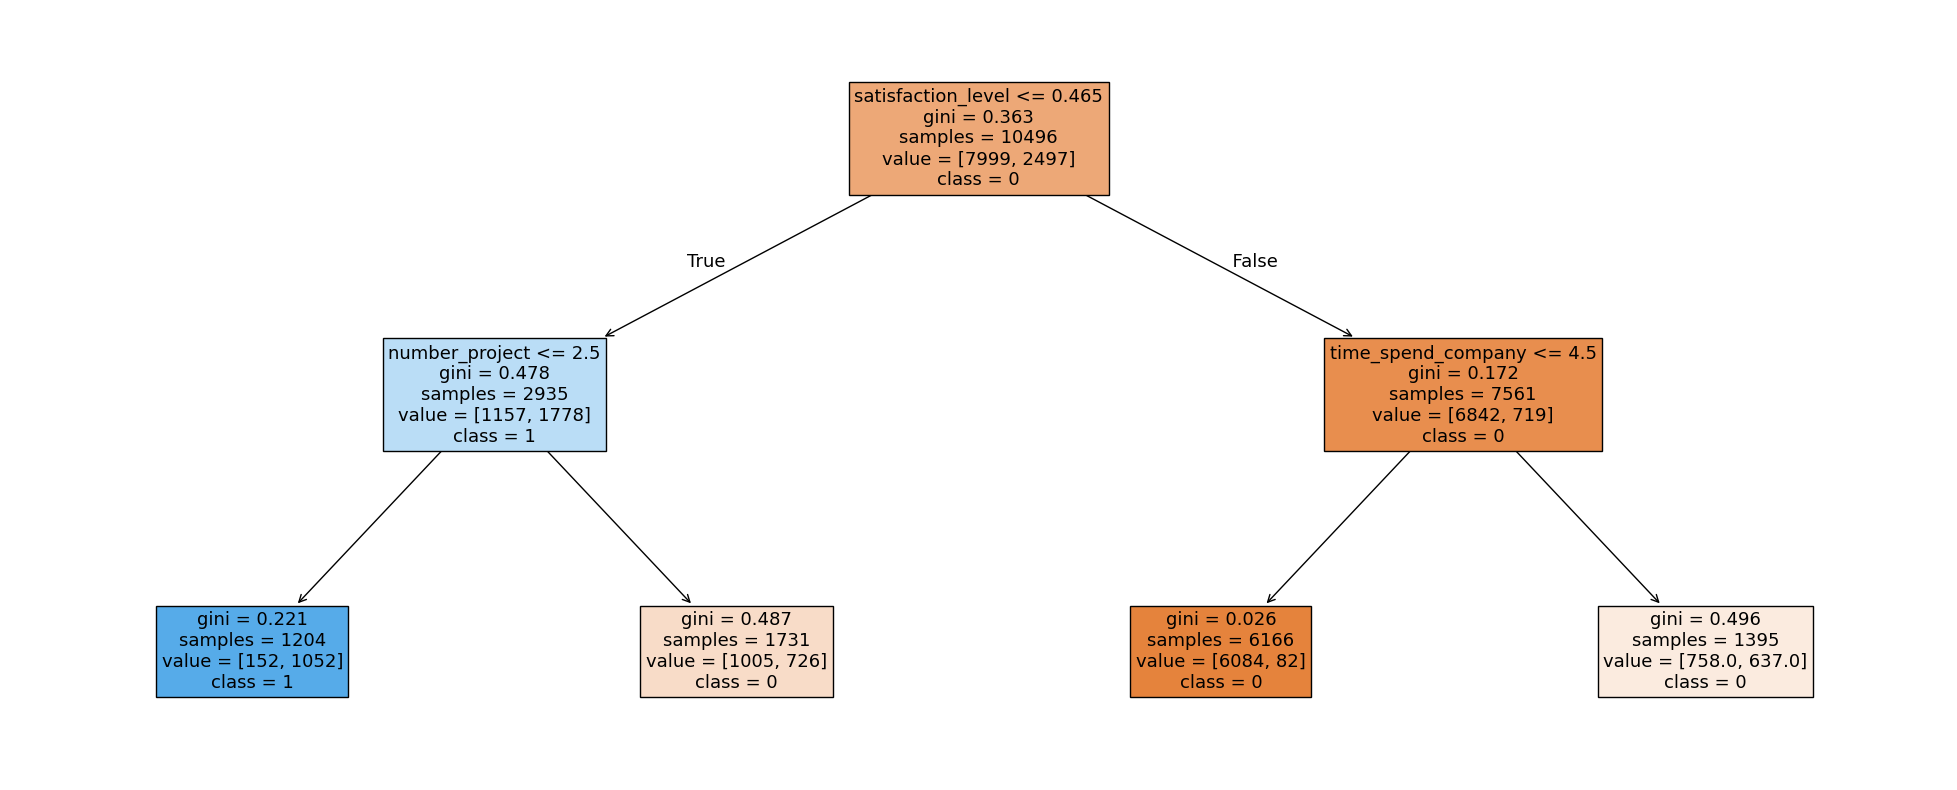

In [155]:
plt.figure(figsize=(25,10))
plot_tree(dtc,feature_names=xtrain.columns,class_names=["0","1"],filled=True,fontsize=13)
plt.show()

# finding best fit using grid search

In [160]:
dtc=DecisionTreeClassifier(random_state=24)

#parameters
params={
    "max_depth":[2,5,7,10,13,None]}

#kfold
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=24)

#grid search
svm_gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,verbose=3)
svm_gcv.fit(x,y)

#printing best parameters
print(svm_gcv.best_params_)
print(svm_gcv.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .......................max_depth=2;, score=0.845 total time=   0.0s
[CV 2/5] END .......................max_depth=2;, score=0.852 total time=   0.0s
[CV 3/5] END .......................max_depth=2;, score=0.850 total time=   0.0s
[CV 4/5] END .......................max_depth=2;, score=0.850 total time=   0.0s
[CV 5/5] END .......................max_depth=2;, score=0.853 total time=   0.0s
[CV 1/5] END .......................max_depth=5;, score=0.978 total time=   0.0s
[CV 2/5] END .......................max_depth=5;, score=0.975 total time=   0.0s
[CV 3/5] END .......................max_depth=5;, score=0.973 total time=   0.0s
[CV 4/5] END .......................max_depth=5;, score=0.972 total time=   0.0s
[CV 5/5] END .......................max_depth=5;, score=0.972 total time=   0.0s
[CV 1/5] END .......................max_depth=7;, score=0.982 total time=   0.0s
[CV 2/5] END .......................max_depth=7;,

# finding best fit using grid search
### using parameters as min_samples_split and min_samples_leaf 
### results in term of accuracy

In [164]:
dtc=DecisionTreeClassifier(random_state=24)

#parameters
params={
    "max_depth":[2,5,7,10,13,None],'min_samples_split':[2,5,7,10,13], 'min_samples_leaf':[1,5,7,10,13]}

#kfold
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=24)

#grid search
svm_gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,verbose=3)
svm_gcv.fit(x,y)

#printing best parameters
print(svm_gcv.best_params_)
print(svm_gcv.best_score_)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.845 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.852 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.850 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.850 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.853 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.845 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.852 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.850 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.850 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, 

# finding best fit using grid search
### using parameters as min_samples_split and min_samples_leaf 
### results in term of log loss
### in term of metrics log loss give better results than accuracy

In [165]:
dtc=DecisionTreeClassifier(random_state=24)

#parameters
params={
    "max_depth":[2,5,7,10,13,None],'min_samples_split':[2,5,7,10,13], 'min_samples_leaf':[1,5,7,10,13]}

#kfold
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=24)

#grid search
svm_gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,verbose=3, scoring='neg_log_loss')
svm_gcv.fit(x,y)

#printing best parameters
print(svm_gcv.best_params_)
print(svm_gcv.best_score_)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.281 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.288 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.284 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.307 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.286 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.281 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.288 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.284 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.307 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples

# ploting best estimated tree 

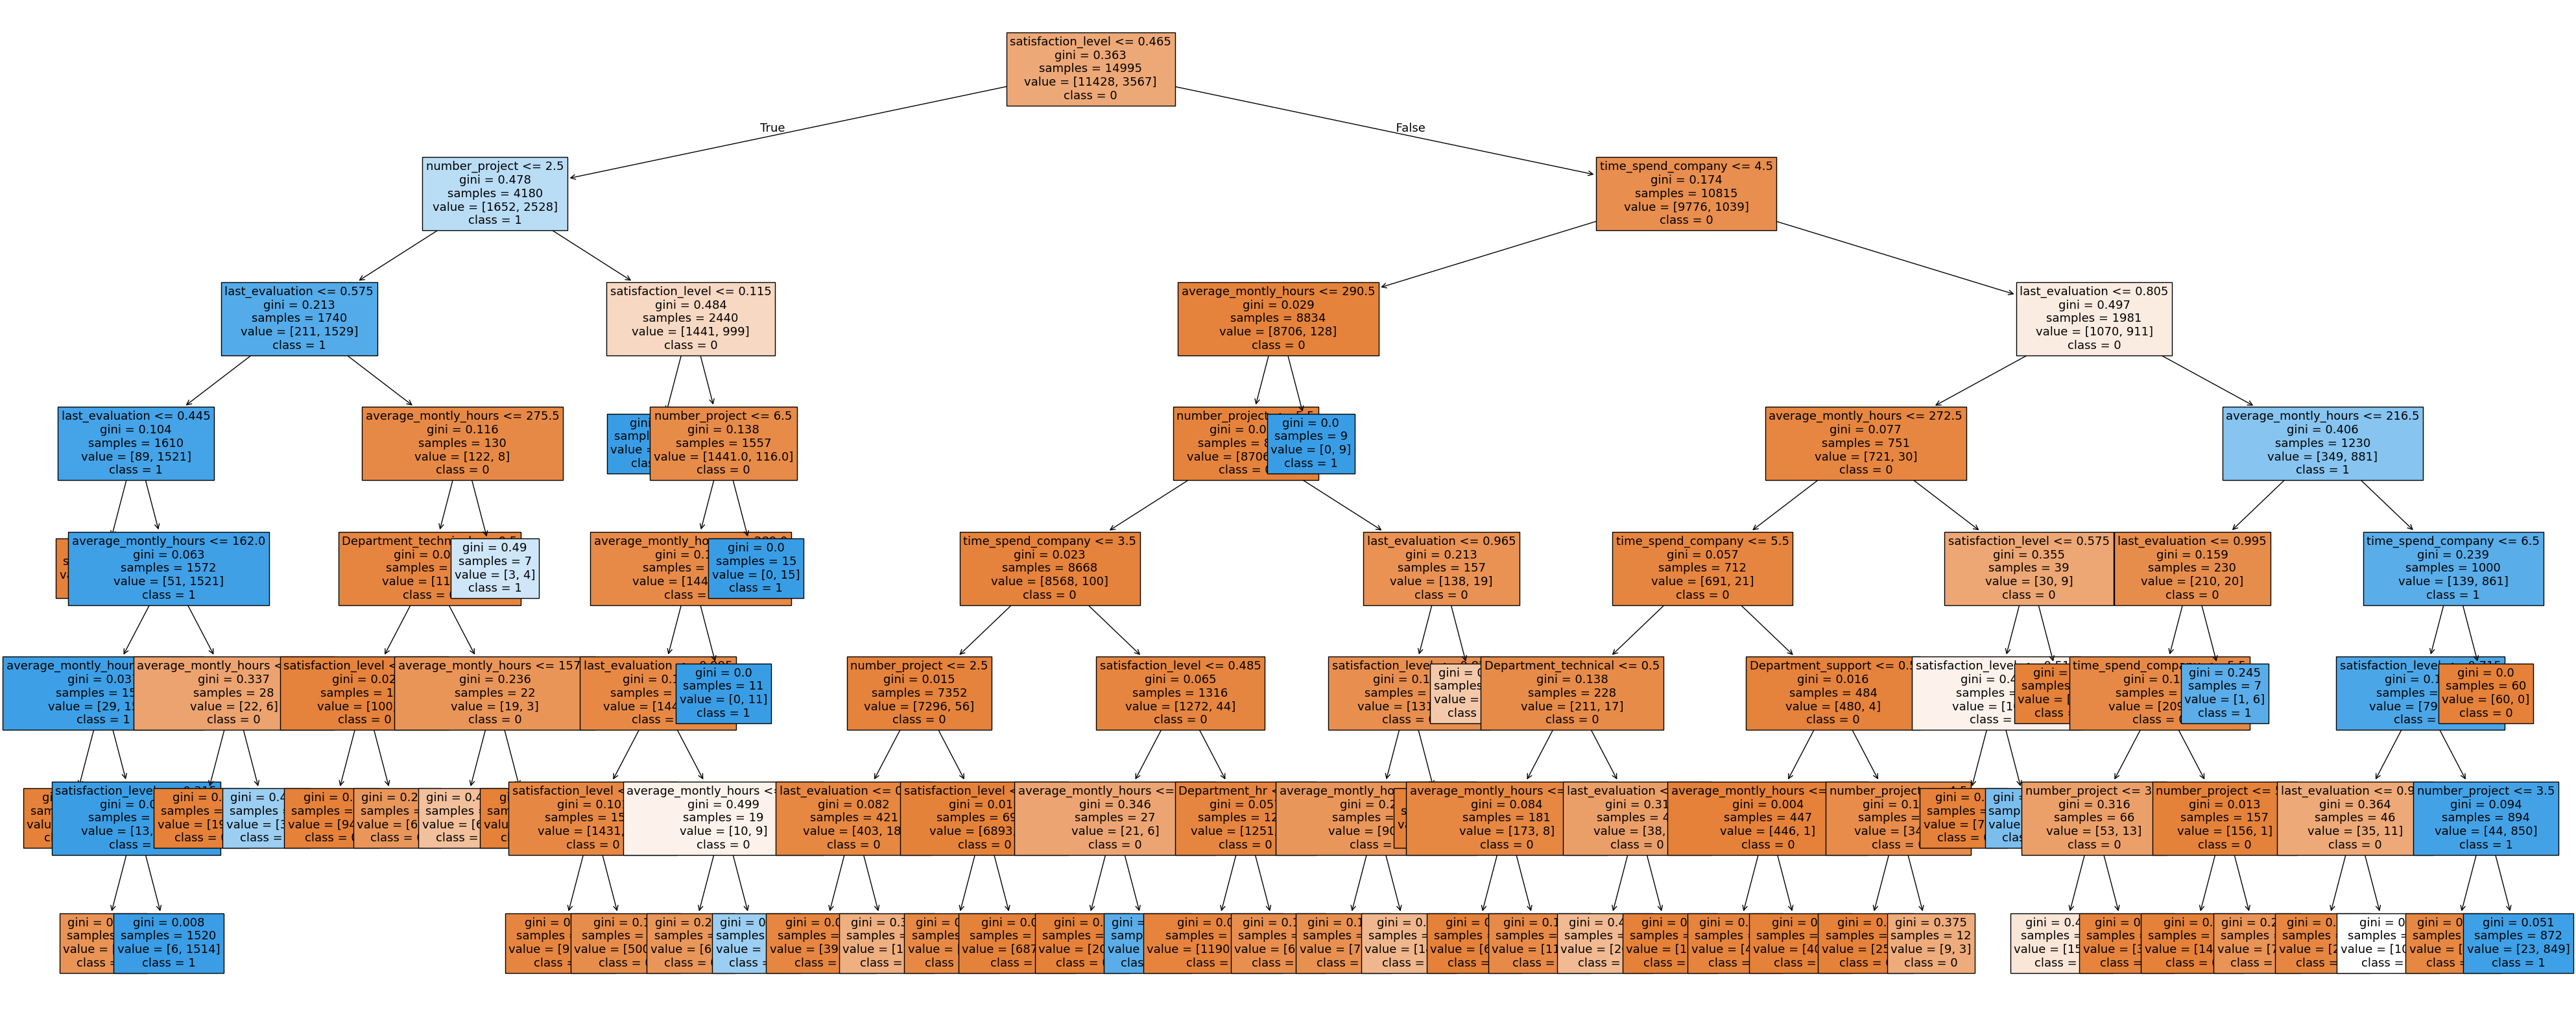

In [168]:
best_tree = svm_gcv.best_estimator_

plt.figure(figsize=(50,20))
plot_tree(best_tree,feature_names=xtrain.columns,class_names=["0","1"],filled=True,fontsize=13)
plt.show()

# importance variable


In [171]:
imp = best_tree.feature_importances_
imp

array([5.27459389e-01, 1.43961657e-01, 1.06020358e-01, 7.09939439e-02,
       1.50874812e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.57370325e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.62907134e-05, 4.46178918e-04,
       0.00000000e+00, 0.00000000e+00])

# columns according to importance

In [172]:
x.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

# ploting importance features

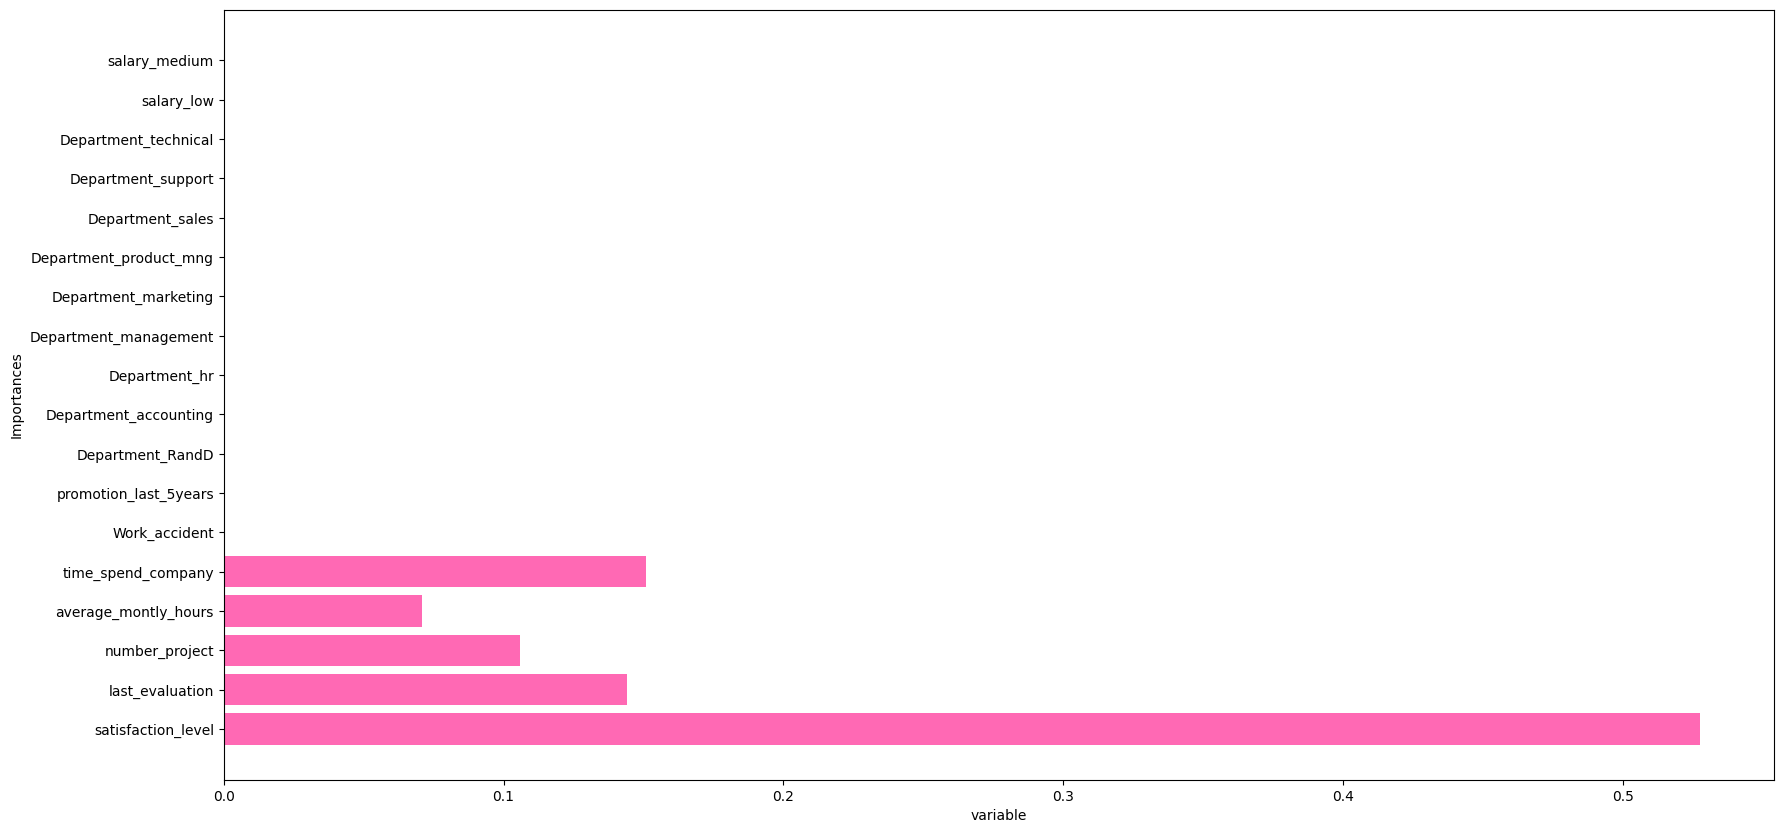

In [181]:
pd_imp = pd.DataFrame({'var':list(x.columns), 'imp':best_tree.feature_importances_})
plt.figure(figsize=(20,10))
plt.barh(pd_imp['var'], pd_imp['imp'], color='hotpink')
plt.xlabel('variable')
plt.ylabel('Importances')
plt.show()

# desision tree classifier in Bankruptcy case

In [247]:
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\cases\Bankruptcy")

In [248]:
df=pd.read_csv("Bankruptcy.csv")

In [249]:
df.head()


NO  D  YR    R1    R2    R3    R4    R5    R6    R7  ...   R15   R16   R17  \
0   1  0  78  0.23  0.08  0.02  0.03  0.46  0.12  0.19  ...  0.05  0.57  0.15   
1   2  0  77  0.19  0.07  0.09  0.12  0.02  0.02  0.03  ...  0.09  0.12  0.16   
2   3  0  72  0.07  0.02  0.03  0.05  0.06  0.10  0.14  ... -0.03  0.02  0.02   
3   4  0  80  0.07  0.03  0.04  0.04  0.04  0.06  0.06  ... -0.02  0.01  0.02   
4   5  0  81  0.09  0.02  0.03  0.04  0.06  0.08  0.11  ...  0.02  0.07  0.10   

    R18    R19   R20   R21   R22   R23   R24  
0  0.23   3.56  0.26  1.55  0.43  0.11  0.17  
1  0.22   3.78  1.29  1.40  0.06  0.07  0.10  
2  0.04  13.29  1.61  1.43  0.03  0.05  0.07  
3  0.02   5.36  1.30  1.12 -0.06 -0.08 -0.09  
4  0.14   7.74  1.48  1.41  0.03  0.04  0.06  

[5 rows x 27 columns]

In [250]:
#checking is data is balanced or not
df["D"].value_counts()

D
0    66
1    66
Name: count, dtype: int64

In [251]:
x1=df.drop(["D","YR","NO"],axis=1)
y1=df["D"]

In [252]:
dtc=DecisionTreeClassifier(random_state=24)

#parameters
params={
    "max_depth":[2,5,7,10,13,None],'min_samples_split':[2,5,7,10,13], 'min_samples_leaf':[1,5,7,10,13]}

#kfold
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=24)

#grid search
svm_gcv1=GridSearchCV(dtc,param_grid=params,cv=kfold,verbose=3, scoring='neg_log_loss')
svm_gcv1.fit(x1,y1)

#printing best parameters
print(svm_gcv1.best_params_)
print(svm_gcv1.best_score_)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-1.657 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.409 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.558 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-4.597 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-1.750 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-1.657 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.409 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.558 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-4.597 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples

In [259]:
best_tree = svm_gcv.best_estimator_
imp1 = best_tree.feature_importances_
imp1



array([0.06223951, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16113631, 0.        , 0.        , 0.77662418])

In [260]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R1      132 non-null    float64
 1   R2      132 non-null    float64
 2   R3      132 non-null    float64
 3   R4      132 non-null    float64
 4   R5      132 non-null    float64
 5   R6      132 non-null    float64
 6   R7      132 non-null    float64
 7   R8      132 non-null    float64
 8   R9      132 non-null    float64
 9   R10     132 non-null    float64
 10  R11     132 non-null    float64
 11  R12     132 non-null    float64
 12  R13     132 non-null    float64
 13  R14     132 non-null    float64
 14  R15     132 non-null    float64
 15  R16     132 non-null    float64
 16  R17     132 non-null    float64
 17  R18     132 non-null    float64
 18  R19     132 non-null    float64
 19  R20     132 non-null    float64
 20  R21     132 non-null    float64
 21  R22     132 non-null    float64
 22  R2

In [261]:
len(imp1)

24

In [262]:
pd_imp = pd.DataFrame({'var':list(x1.columns), 'imp':imp1})


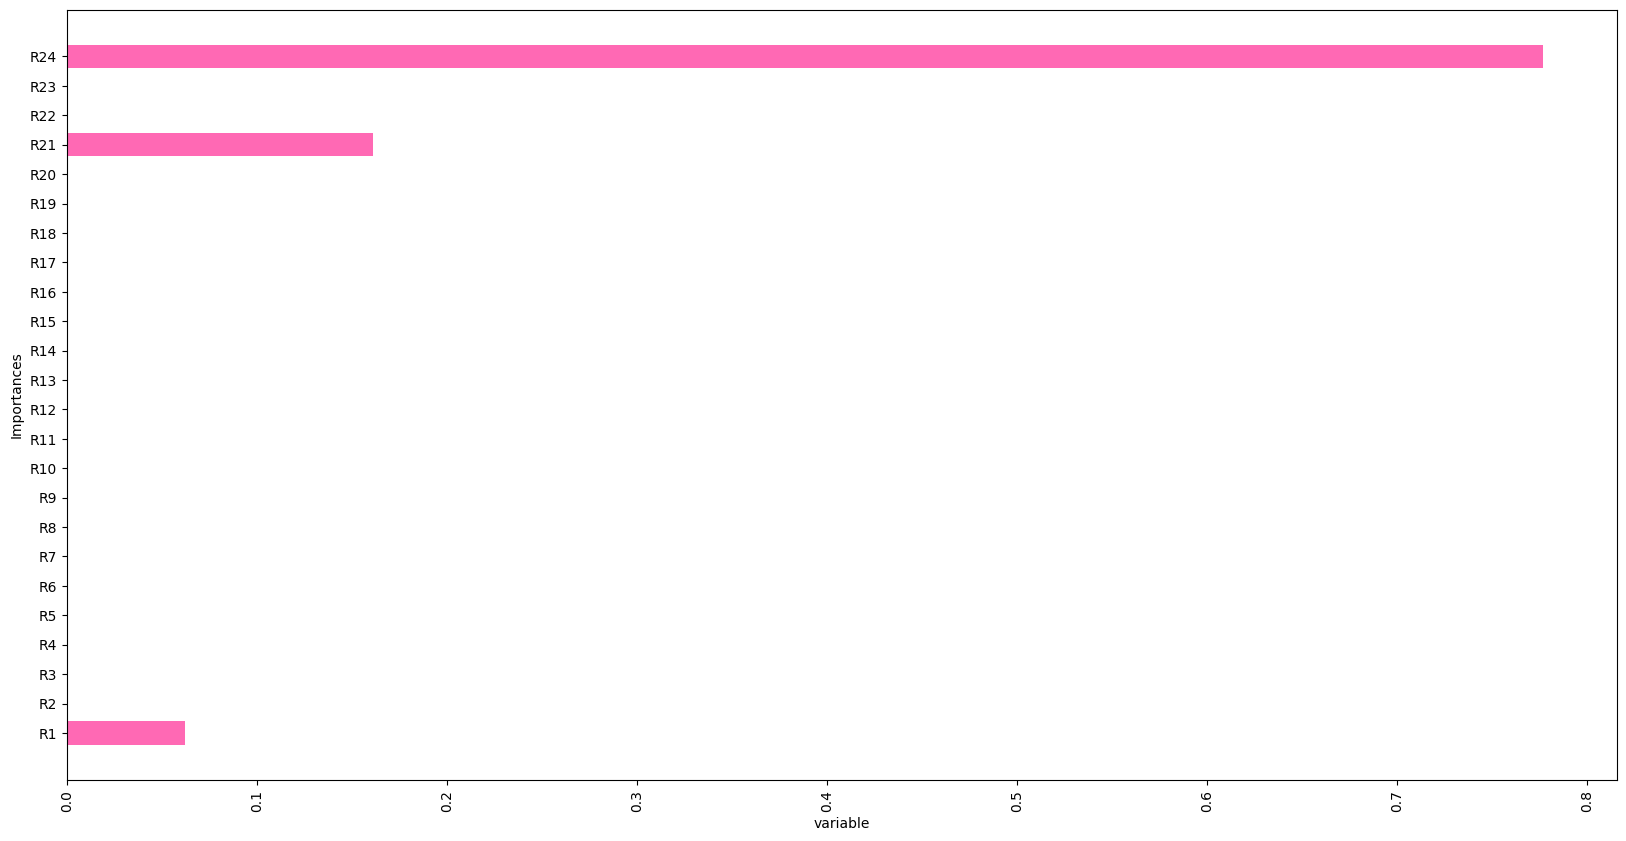

In [264]:
pd_imp = pd.DataFrame({'var':list(x.columns), 'imp':best_tree.feature_importances_})
plt.figure(figsize=(20,10))
plt.barh(pd_imp['var'], pd_imp['imp'], color='hotpink')
plt.xticks(rotation=90)
plt.xlabel('variable')
plt.ylabel('Importances')
plt.show()

# decision tree classification on smoker status case

In [317]:
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\competition\Binary Prediction of Smoker Status using Bio-Signals")

In [318]:
df=pd.read_csv("train.csv",index_col=0)

In [319]:
df.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                            
0    55         165          60       81.0             0.5              0.6   
1    70         165          65       89.0             0.6              0.7   
2    20         170          75       81.0             0.4              0.5   
3    35         180          95      105.0             1.5              1.2   
4    30         165          60       80.5             1.5              1.0   

    hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
id                                                       ...             
0               1               1       135          87  ...   40   75   
1               2               2       146          83  ...   57  126   
2               1               1       118          75  ...   45   93   
3               1               1       131          88  ...   38  102   
4               1               1       121          76  ...   44   93   

    hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
id                                                                              
0         16.5              1               1.0   22   25   27              0   
1         16.2              1               1.1   27   23   37              1   
2         17.4              1               0.8   27   31   53              0   
3         15.9              1               1.0   20   27   30              1   
4         15.4              1               0.8   19   13   17              0   

    smoking  
id           
0         1  
1         0  
2         1  
3         0  
4         1  

[5 rows x 23 columns]

In [320]:
y=df["smoking"]
x=df.drop("smoking",axis=1)

In [321]:
dtc=DecisionTreeClassifier(random_state=24)

#parameters
params={
    "max_depth":[2,5,7,10,13,None],'min_samples_split':[2,5,7,10,13], 'min_samples_leaf':[1,5,7,10,13]}

#kfold
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=24)

#grid search
svm_gcv1=GridSearchCV(dtc,param_grid=params,cv=kfold,verbose=3, scoring='neg_log_loss')
svm_gcv1.fit(x,y)

#printing best parameters
print(svm_gcv1.best_params_)
print(svm_gcv1.best_score_)


best_tree = svm_gcv1.best_estimator_
imp1 = best_tree.feature_importances_
imp1



Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.524 total time=   0.1s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.525 total time=   0.1s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.527 total time=   0.1s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.527 total time=   0.1s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.522 total time=   0.1s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.524 total time=   0.1s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.525 total time=   0.1s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.527 total time=   0.1s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.527 total time=   0.1s
[CV 5/5] END max_depth=2, min_samples

array([1.85066144e-02, 6.18328964e-01, 0.00000000e+00, 2.11918563e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.32514626e-04, 8.84680789e-05, 3.43208195e-04, 1.36764229e-03,
       5.49979914e-02, 1.10897836e-03, 2.03620657e-02, 1.22558748e-01,
       0.00000000e+00, 5.22182018e-03, 4.87993061e-03, 3.78952519e-03,
       1.46764249e-01, 8.37362463e-04])

In [ ]:
# plot feature importance

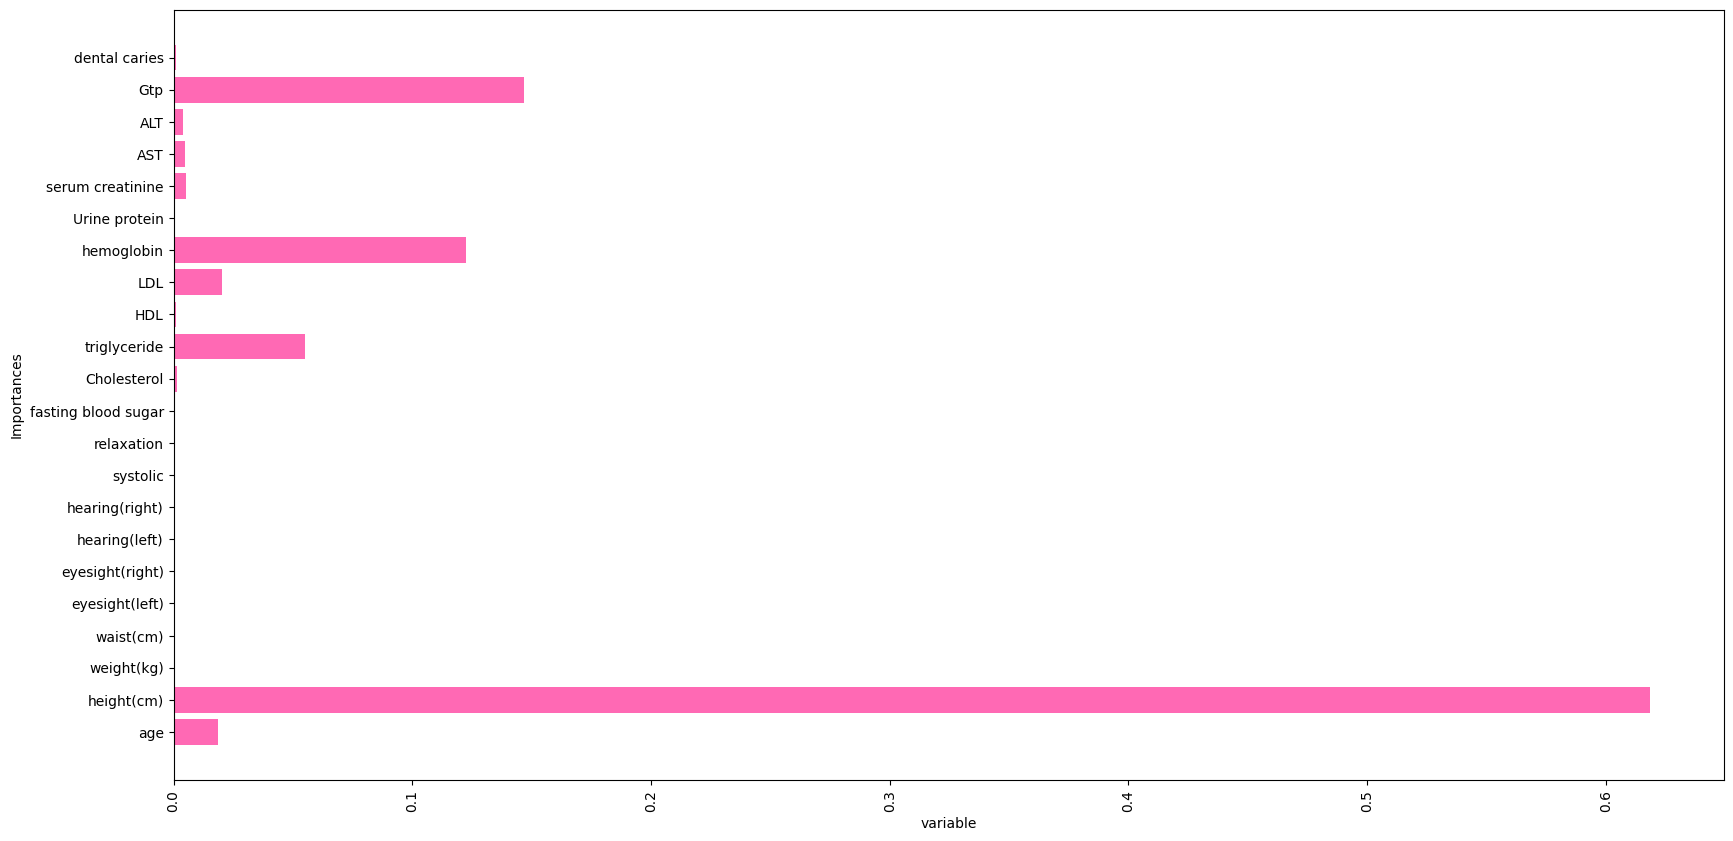

In [323]:
pd_imp = pd.DataFrame({'var':list(x.columns), 'imp':best_tree.feature_importances_})
plt.figure(figsize=(20,10))
plt.barh(pd_imp['var'], pd_imp['imp'], color='hotpink')
plt.xticks(rotation=90)
plt.xlabel('variable')
plt.ylabel('Importances')
plt.show()

# saving model 


In [325]:
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\competition\Binary Prediction of Smoker Status using Bio-Signals")
best_model=svm_gcv1.best_estimator_
from joblib import dump
dump(best_model,"tree_model.joblib")

['tree_model.joblib']

# loading model


In [326]:
from joblib import load
import os
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\competition\Binary Prediction of Smoker Status using Bio-Signals")

In [327]:
loaded_tree=load("tree_model.joblib")

In [328]:
# calculate probability after saving and loading model directly
test=pd.read_csv("test.csv",index_col=0)
prob=loaded_tree.predict_proba(test)[:,1]

In [329]:
prob

array([0.74793774, 0.27299703, 0.52517986, ..., 0.40392908, 0.27937916,
       0.01784414])

In [322]:
# inferencing 

In [330]:
submit=pd.DataFrame({"id":list(test.index),"smoking":prob})
submit.to_csv("sbt_24_jun_tree.csv",index=False)

# dession tree Regressor

### on Concrete _data case

In [336]:
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\cases\Concrete Strength")
from sklearn.tree import DecisionTreeRegressor

In [337]:
df=pd.read_csv("Concrete_Data.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly               1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   Coarse            1030 non-null   float64
 6   Fine              1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   Strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [338]:
x=df.drop("Strength",axis=1)
y=df["Strength"]

In [339]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=24)

In [341]:
dtr = DecisionTreeRegressor(random_state=24, max_depth=2)
dtr.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=2, random_state=24)

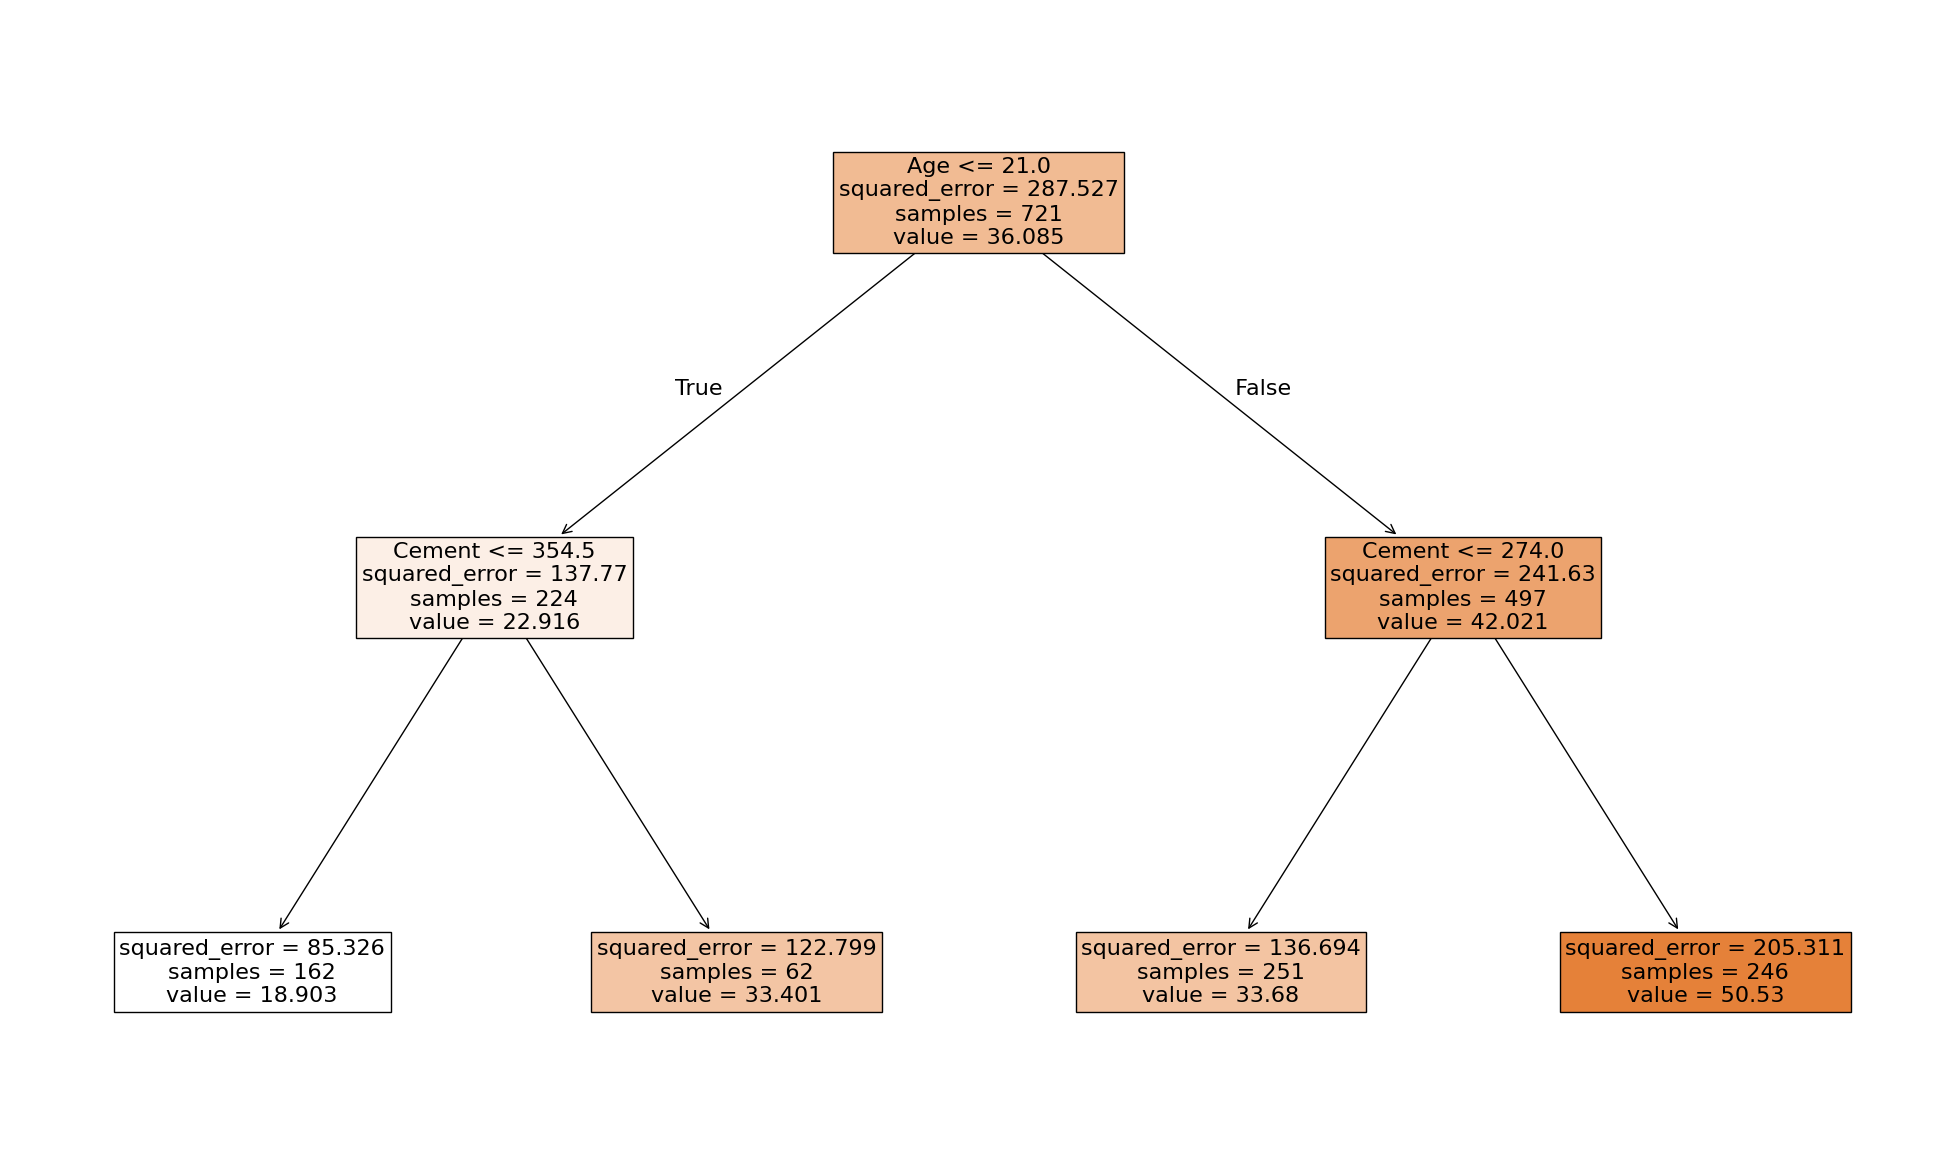

In [348]:

plt.figure(figsize=(25,15))
plot_tree(dtr, feature_names = xtrain.columns, filled=True, fontsize=16)
plt.show()

In [350]:
y_pred = dtr.predict(ytrain,ytest)
print(r2_score(ytrain, y_pred))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# using

In [358]:


dtr = DecisionTreeRegressor(random_state=24)

#parameters
params={
    "max_depth":[2,5,7,10,13,None],'min_samples_split':[2,5,7,10,13], 'min_samples_leaf':[1,5,7,10,13]}

#kfold
kfold=KFold(n_splits=5,shuffle=True,random_state=24)

#grid search
dtr_gcv=GridSearchCV(dtr,param_grid=params,cv=kfold,verbose=3)
dtr_gcv.fit(x,y)

#printing best parameters
print(dtr_gcv.best_params_)
print(dtr_gcv.best_score_)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.522 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.382 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.535 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.368 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.524 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.522 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.382 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.535 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.368 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, 

In [359]:
best_tree=dtr_gcv.best_estimator_

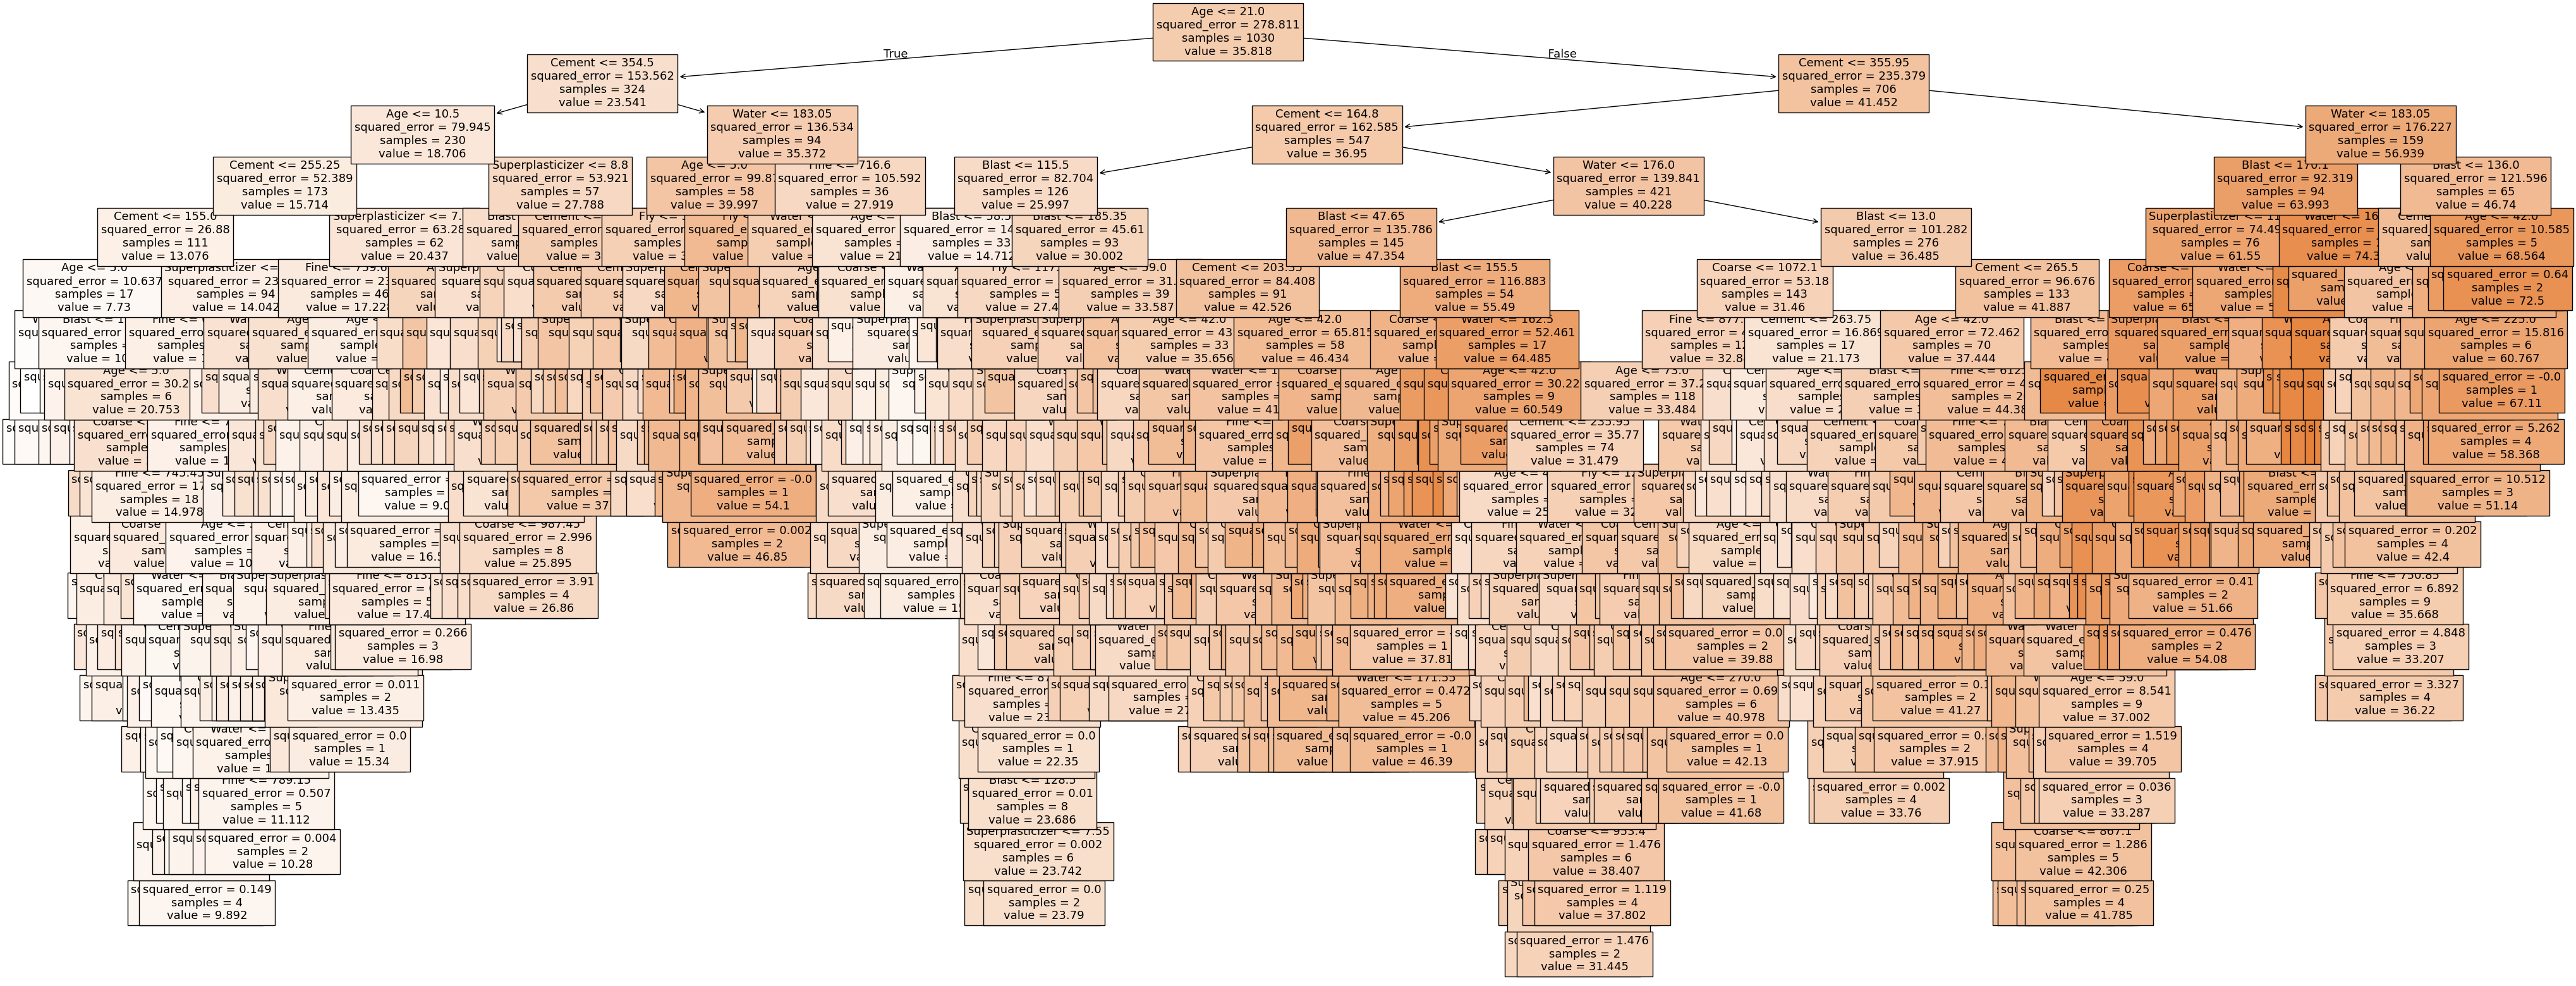

In [361]:
plt.figure(figsize=(50,20))
plot_tree(best_tree,feature_names=xtrain.columns,class_names=["0","1"],filled=True,fontsize=13)
plt.show()

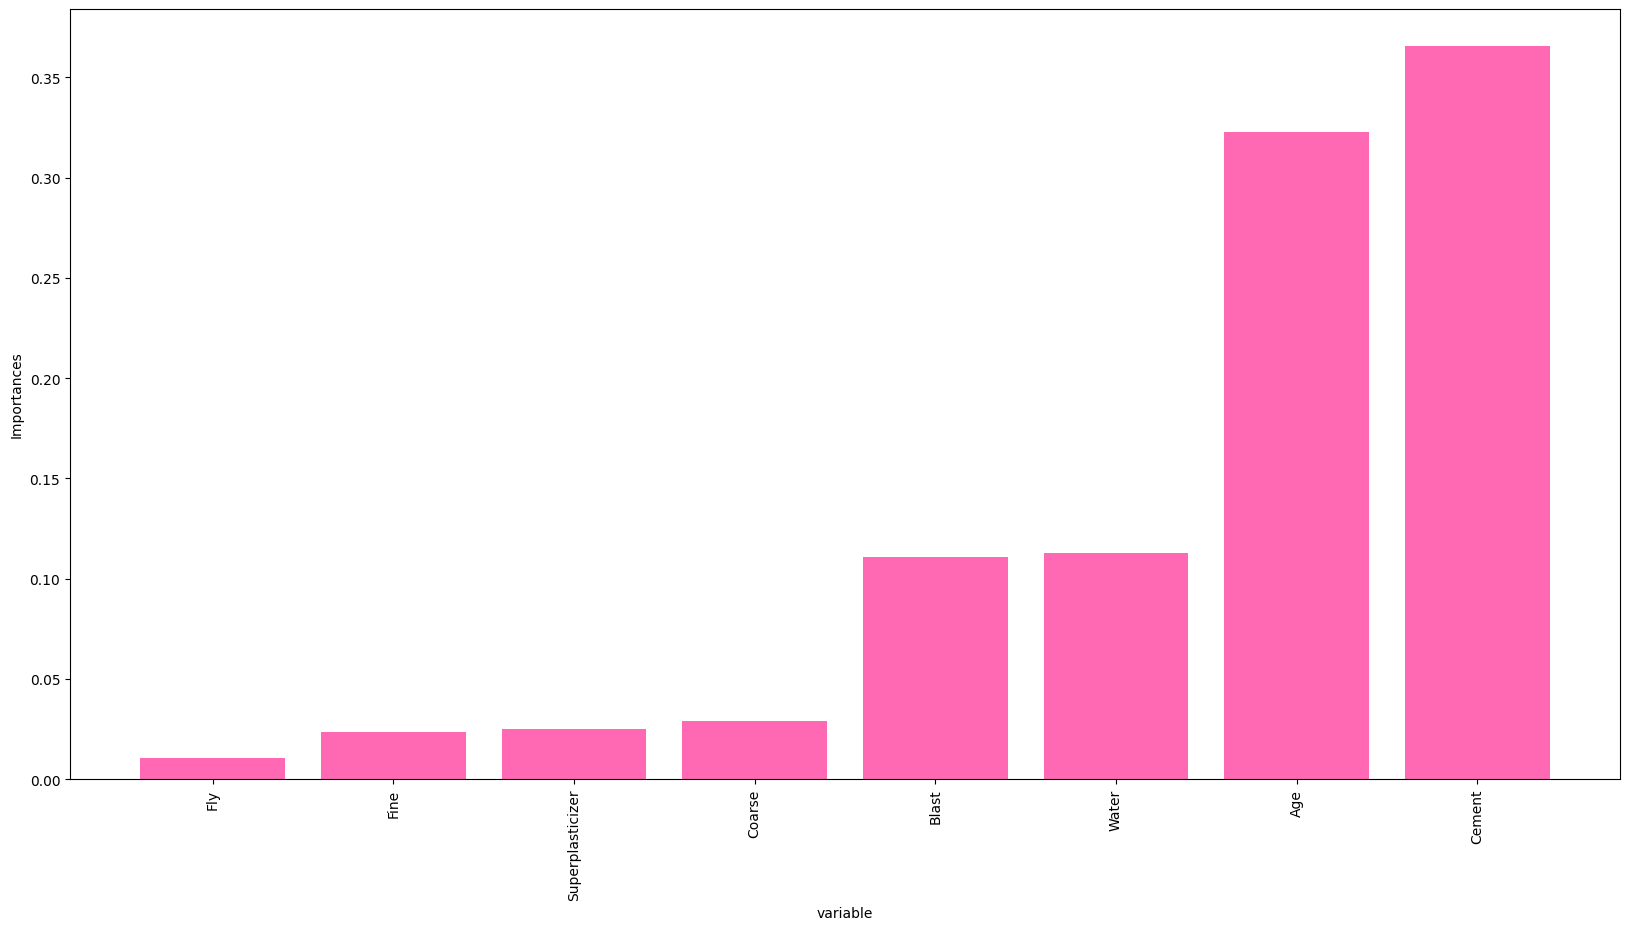

In [373]:
imp=best_tree.feature_importances_
pd_imp = pd.DataFrame({'var':list(x.columns), 'imp':best_tree.feature_importances_})
pd_imp=pd_imp.sort_values(by="imp")
plt.figure(figsize=(20,10))
plt.bar(pd_imp['var'], pd_imp['imp'], color='hotpink')
plt.xticks(rotation=90)
plt.xlabel('variable')
plt.ylabel('Importances')
plt.show()

In [374]:
# Mohs hardness

In [375]:
os.chdir(r"C:\Users\dbda\Desktop\MACHINE LEARNING\competition")

In [386]:
df=pd.read_csv("train.csv",index_col=0)

In [387]:
df.head()

allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
id                                                                           
0                100.0       0.841611                  10.0            4.8   
1                100.0       7.558488                  10.0            4.8   
2                 76.0       8.885992                  15.6            5.6   
3                100.0       8.795296                  10.0            4.8   
4                116.0       9.577996                  11.6            4.8   

    atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
id                                                                
0              20.612526           11.08810               2.766   
1              20.298893           12.04083               2.755   
2              33.739258           12.08630               2.828   
3              20.213349           10.94850               2.648   
4              24.988133           11.82448               2.766   

    R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
id                                                                  
0                   1.732                  0.860         0.496070   
1                   1.631                  0.910         0.492719   
2                   1.788                  0.864         0.481478   
3                   1.626                  0.936         0.489272   
4                   1.682                  0.896         0.492736   

    density_Average  Hardness  
id                             
0           0.91457       6.0  
1           0.71760       6.5  
2           1.50633       2.5  
3           0.78937       6.0  
4           1.86481       6.0

In [388]:
df.isna().sum()

allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [389]:
x=df.drop("Hardness",axis=1)
y=df["Hardness"]

In [397]:


dtr = DecisionTreeRegressor(random_state=24)

#parameters
params={
    "max_depth":[2,5,7,10,13,None],'min_samples_split':[2,5,7,10,13], 'min_samples_leaf':[1,5,7,10,13]}

#kfold
kfold=KFold(n_splits=5,shuffle=True,random_state=24)

#grid search
dtr_gcv=GridSearchCV(dtr,param_grid=params,cv=kfold,verbose=3,scoring="neg_median_absolute_error")   #scoring is not given then default scoring is r2 score
dtr_gcv.fit(x,y)

#printing best parameters
print(dtr_gcv.best_params_)
print(dtr_gcv.best_score_)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.873 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.957 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.879 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.927 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=-0.877 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.873 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.957 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.879 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=-0.927 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples

In [395]:
best_model=dtr_gcv.best_estimator_

In [396]:
## inferencing  (saving final result in csv)
test=pd.read_csv("test.csv",index_col=0)
pred_hard=best_model.predict(test)

submit=pd.read_csv("sample_submission.csv")
submit["Hardness"]=pred_hard
submit.to_csv("submission_dtr.csv",index=False)


In [398]:
#plot best tree


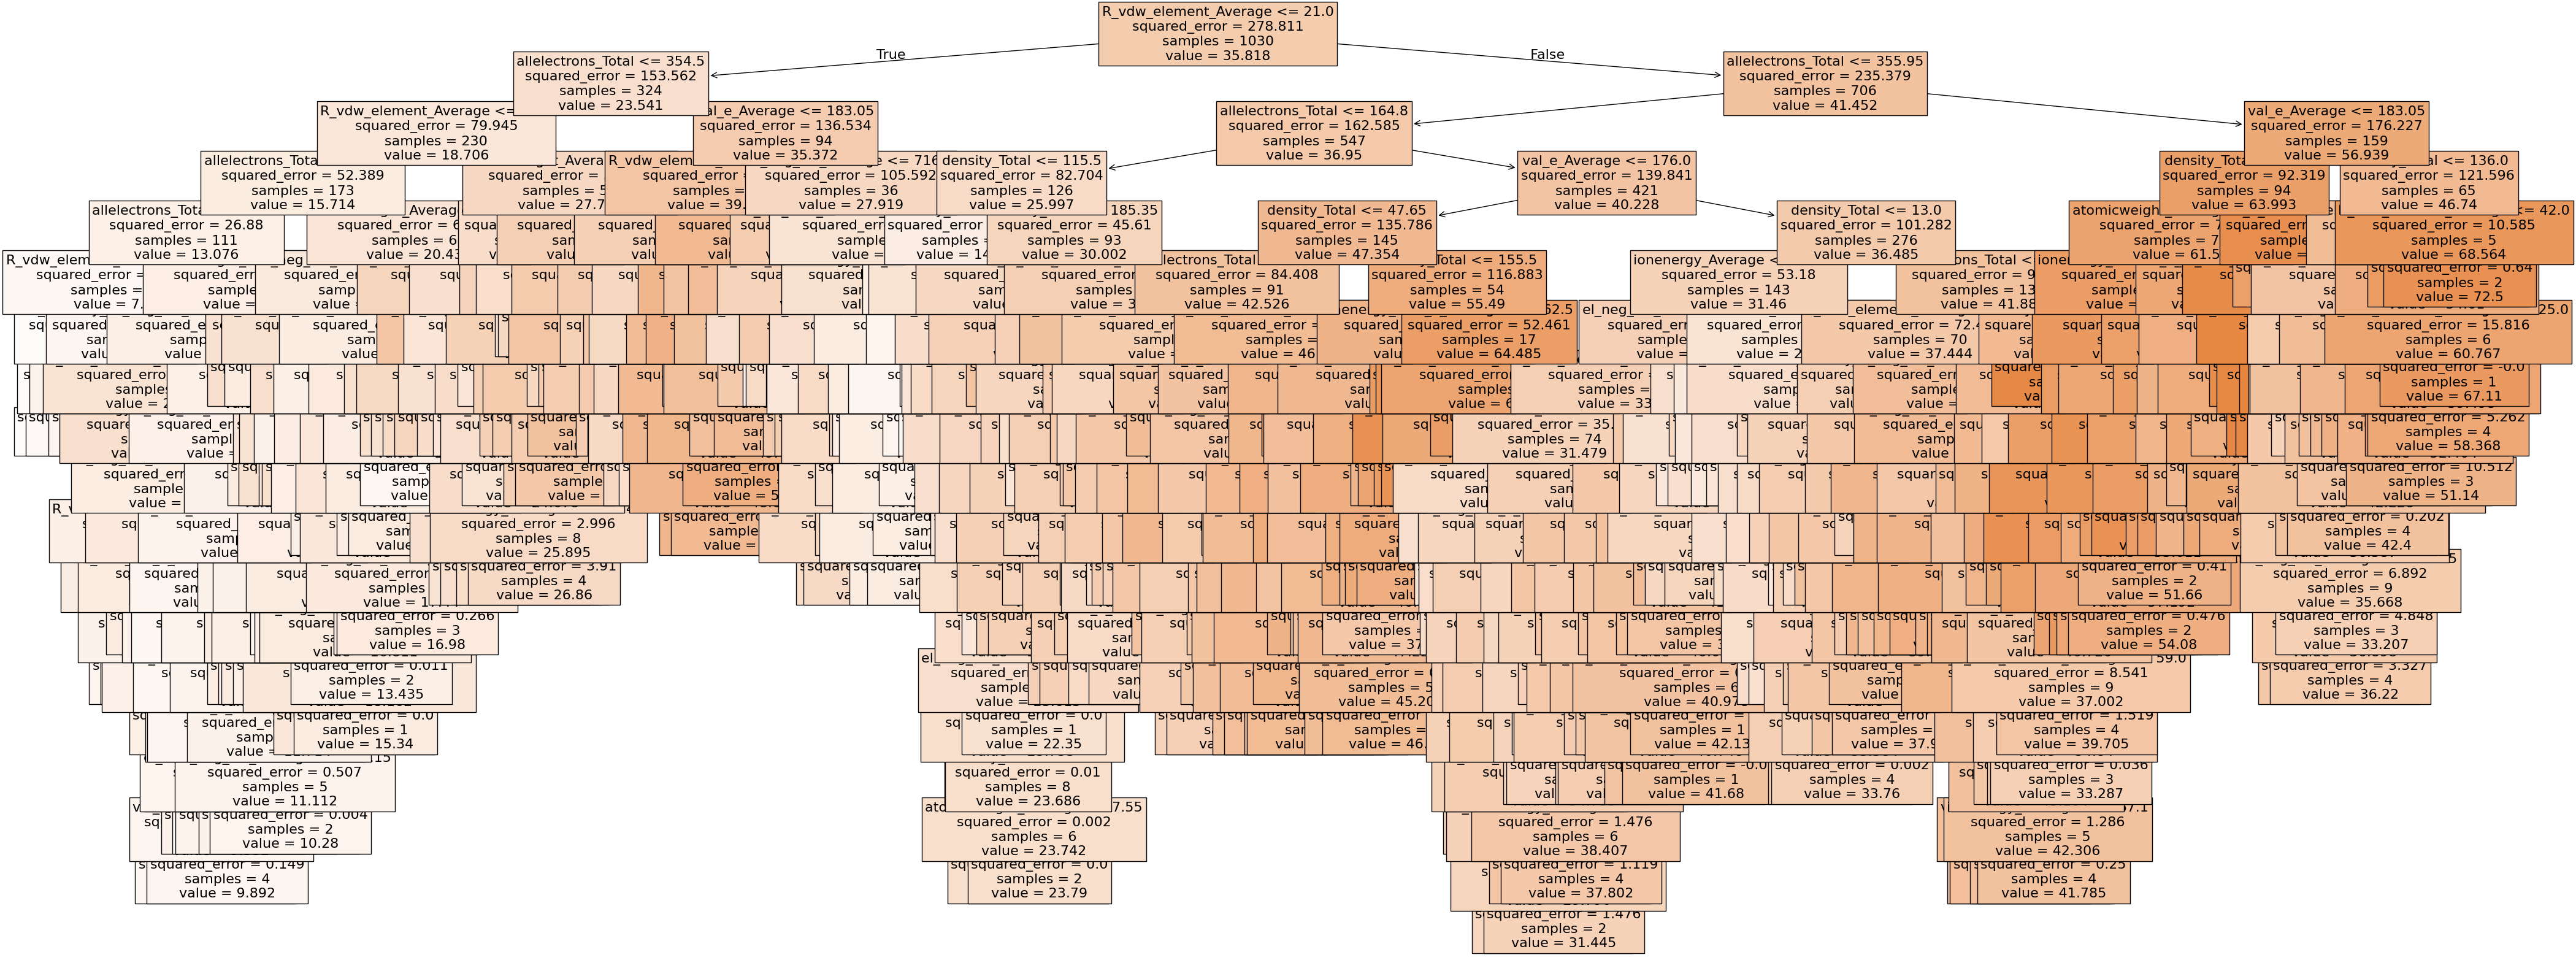

In [399]:
plt.figure(figsize=(50,20))
plot_tree(best_tree,feature_names=x.columns,filled=True,fontsize=16)
plt.show()